11/12 training on subcortical regions
seed: 849766

(K Fold Final Result)| avg_acc=62.14 +-  2.59, avg_auc=69.47 +- 4.32, avg_macro=61.62 +- 2.05

11/12 training on subcortical regions, seed: 965380

(K Fold Final Result)| avg_acc=64.32 +-  1.07, avg_auc=69.20 +- 1.17, avg_macro=64.20 +- 1.03

## Learning Visualization for Second Run Below

In [2]:
from matplotlib import pyplot as plt
import csv
import numpy as np

In [96]:
def load_results(file_name):
    learning = []

    with open("my_results.csv", 'r') as f:
        reader = csv.reader(f)
        for line in reader:
            learning.append(line)

    for step in learning:
        step[0] = int(step[0])
        for i in range(1, 8):
            step[i] = float(step[i])

    learning = np.array(learning)
    
    return learning

In [86]:
def avg_folds(data, num_folds=5):
    avg_results = [[0 for _ in range(len(data[0]))] for _ in range(len(data) // num_folds)]
    for row in data:
        for j in range(0, len(row)):
            avg_results[int(row[0])][j] += row[j]
    for i in range(len(avg_results)):
        for j in range(1, len(avg_results[0])):
            avg_results[i][j] /= num_folds
    return np.array(avg_results)

In [87]:
def filter_data(data, col):
    new_data = []
    for i in range(len(data)):
        if data[i][col] != -1:
            new_data.append(data[i])
    return np.array(new_data)

In [100]:
def plot_traj(data, cols, col_names, title):
    plt.xlabel('Epoch')
    n = len(cols)
        
    for i in range(n):
        new_data = filter_data(data, cols[i])
        plt.plot(new_data[:,0], new_data[:,cols[i]])
    
    plt.ylabel(col_names[0]) if n == 1 else plt.legend(col_names)
    
    plt.title(title)
    plt.show()

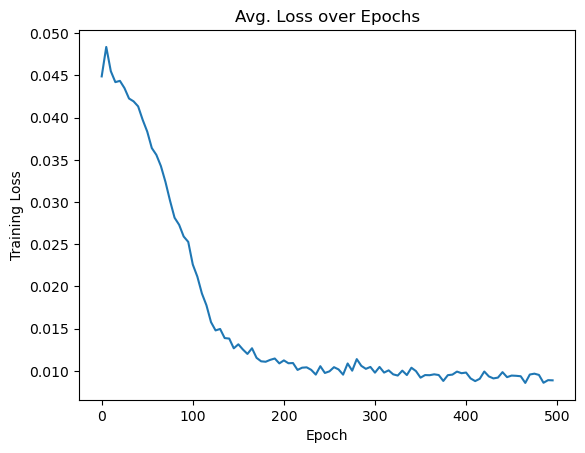

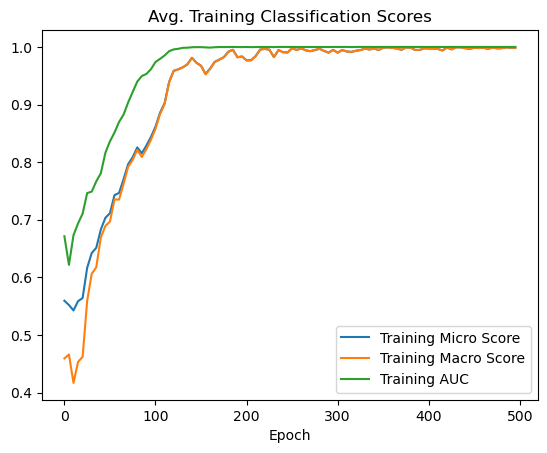

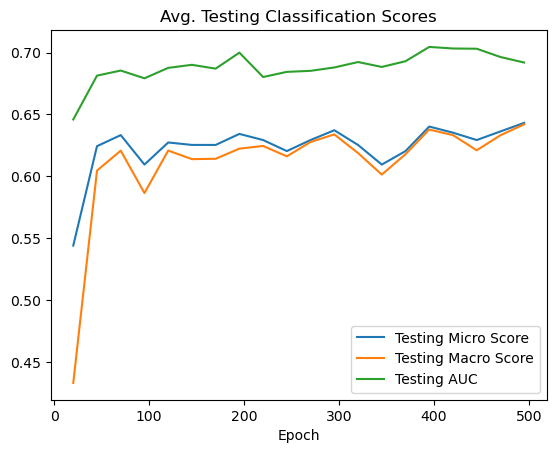

In [101]:
learning = load_results("my_results.csv") # load results - csv in root directory of https://github.com/timothyyao7/BrainGB
avg_res = avg_folds(learning) # average over K-folds, in this case 5
plot_traj(avg_res, [1], ['Training Loss'], 'Avg. Loss over Epochs') # plot negative log-likelihood loss

# plot training and testing classification scores
plot_traj(avg_res, [2, 3, 4], ['Training Micro Score', 'Training Macro Score', 'Training AUC'], 'Avg. Training Classification Scores')
plot_traj(avg_res, [5, 6, 7], ['Testing Micro Score', 'Testing Macro Score', 'Testing AUC'], 'Avg. Testing Classification Scores')